<a href="https://colab.research.google.com/github/avishek-astra/Deep_Learning_Experiments/blob/main/3_qwerties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-2-2ce0d24443bf>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


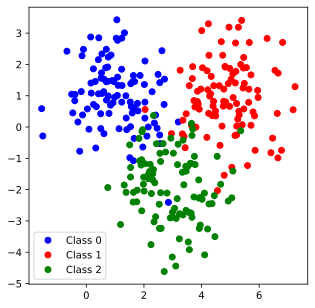

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [24]:
# data creation
nPerClust=100
blur=1

#data centre
A=[1,1]
B=[5,1]
C=[3,-2]
#generate data
a=[A[0]+np.random.randn(nPerClust)*blur,A[1]+np.random.randn(nPerClust)*blur]
b=[B[0]+np.random.randn(nPerClust)*blur,B[1]+np.random.randn(nPerClust)*blur]
c=[C[0]+np.random.randn(nPerClust)*blur,C[1]+np.random.randn(nPerClust)*blur]
#stack the data
#true labels
labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1)), 2 * np.ones((nPerClust,1))))
#concatanate
data_np=np.hstack((a,b,c)).T
#convert to a pytorch tensor
data=torch.tensor(data_np).float()
labels=torch.squeeze(torch.tensor(labels_np).long())
#show the data
fig=plt.figure(figsize=(5,5))
plt.plot(data[labels==0,0],data[labels==0,1],'bo',label='Class 0')
plt.plot(data[labels==1,0],data[labels==1,1],'ro',label='Class 1')
plt.plot(data[labels==2,0],data[labels==2,1],'m*',label='Class 2')


plt.legend()
plt.show()
labels



In [25]:
#building a nn model
#model architecture
ANNq=nn.Sequential(
    nn.Linear(2,4),#input layer
    nn.ReLU(),
    nn.Linear(4,3),#output layer
    nn.Softmax(dim=1) #final activation unit

     )
#loss function
lossfun=nn.CrossEntropyLoss()
#optimizer
optimizer=torch.optim.SGD(ANNq.parameters(), lr=0.01)


In [26]:
numepochs=10000
#initialize losses
losses=torch.zeros(numepochs)
ongoingACC=[]


#loop over epochs
for epochi in range(numepochs):
  #forward pass
  yHat=ANNq(data)
  #compute loss
  loss=lossfun(yHat,labels)
  losses[epochi]=loss
  #backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #compute accuracy
  matches=torch.argmax(yHat,axis=1)==labels #booleans(false/true)
  matchesNumeric=matches.float()            #convert to numbers(0/1)
  accuracyPct=100*torch.mean(matchesNumeric) # average and x100
  ongoingACC.append(accuracyPct)
#final forward pass
predictions=ANNq(data)
predlabels=torch.argmax(predictions,axis=1) #torch.argmax(tensor, dim=n) returns the indices of the maximum values along dimension 1
totalacc=100*torch.mean((predlabels==labels).float())



Final accuracy:92.6667%


Text(0.5, 1.0, 'Accuracy ')

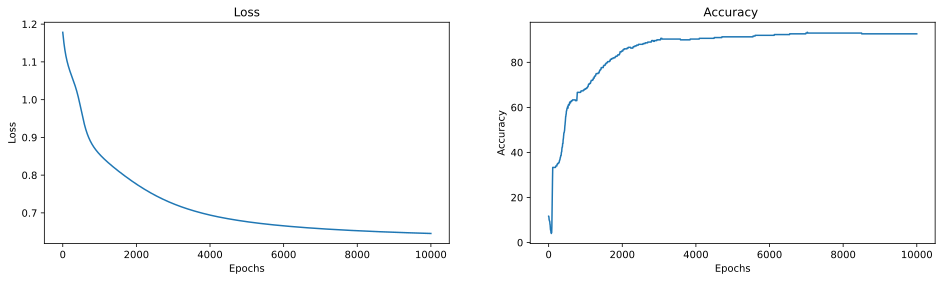

In [28]:
#report accuracy
print('Final accuracy:%g%%'%totalacc)
fig,ax=plt.subplots(1,2,figsize=(16,4))
ax[0].plot(losses.detach())
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss')
ax[1].plot(ongoingACC)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy ')

In [ ]:
#manually compute losses
#final forward pass
predictions =ANNq(data)
#final loss(MSE)
testloss=(predictions-y).pow(2).mean()
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Final loss=%g" %testloss.item())
plt.show()

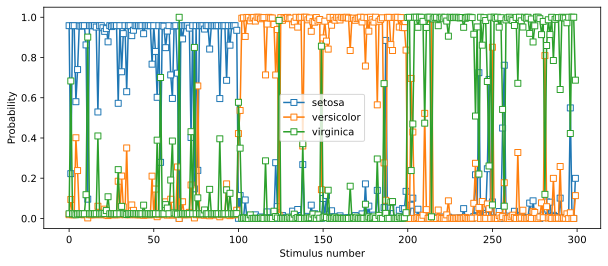

In [30]:
#plot the raw model output
fig=plt.figure(figsize=(10,4))
plt.plot((yHat.detach()),'s-',markerfacecolor='w')
plt.legend(['setosa','versicolor','virginica'])
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.show()


final accuracy :89%


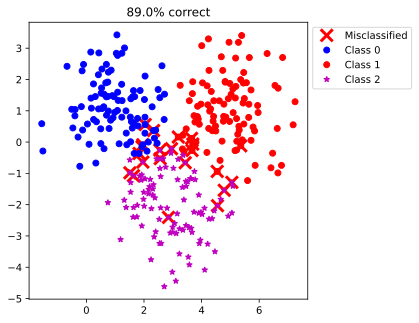

In [35]:
#finding errors
misclassified=np.where(predlabels!=labels)[0]
#total accuracy
totalacc=100-100*len(misclassified)/(2*nPerClust)
print('final accuracy :%g%%'%totalacc)
#plot the data
fig = plt.figure(figsize=(5, 5))
plt.plot(data[misclassified, 0], data[misclassified, 1], 'rx', markersize=12, markeredgewidth=3)
plt.plot(data[predlabels.cpu().numpy() == 0, 0], data[predlabels.cpu().numpy() == 0, 1], 'bo')
plt.plot(data[predlabels.cpu().numpy() == 1, 0], data[predlabels.cpu().numpy() == 1, 1], 'ro')
plt.plot(data[predlabels.cpu().numpy() == 2, 0], data[predlabels.cpu().numpy() == 2, 1], 'm*')
plt.legend(['Misclassified', 'Class 0', 'Class 1', 'Class 2'], bbox_to_anchor=(1, 1))
plt.title(f'{totalacc}% correct')
plt.show()


